<a href="https://colab.research.google.com/github/majadirks/nhs_teaching/blob/master/random_groups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script will take a Class List report from Synergy and shuffle students into random groups.

In Synergy, go to Reports > TXT > Class List
Copy/Paste the resulting file between the triple quotes in the cell below.

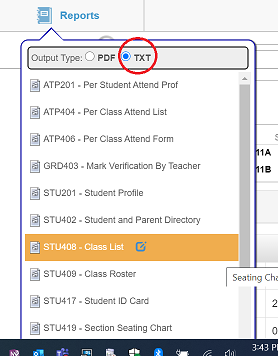

In [ ]:
# In Synergy, go to Reports > TXT > Class List
# Copy/Paste the resulting file between the triple quotes below.
# Use triple quotes (''') to preserve line breaks within the string
class_csv_str ='''PASTE
REPORT
HERE'''

In [ ]:
import pandas as pd
from io import StringIO

# Parse the string from the first cell
class_csv = StringIO(class_csv_str)
class_data = pd.read_csv(class_csv, sep="\t")
# Ignore everything except student name
students = class_data['Student Name']



In [ ]:
from math import ceil

# Place students into random groups
student_count = len(students)
try:
  group_count = int(input("How many groups do you want? (ENTER for 8) > "))
except ValueError:
  print("No valid number entered. Defaulting to 8.")
  group_count = 8
students_per_group = ceil(student_count / group_count)
# Shuffle students
students = students.sample(frac = 1).reset_index(drop = True )
for i in range(group_count): # 0 ... 7 (usually)
  print(f"\n\nGroup {i+1} ({chr(i+65)}):")
  for j in range(students_per_group): # 0 ... 3 (usually)
    # Print the next student in our shuffled set
    next_student_index = i*students_per_group + j + 1
    try:
      print(students[next_student_index])
    except KeyError: # no students left to print
      print("")